In [143]:
library(tidyverse)
library(ggdark)
library(igraph)
library("NatParksPalettes")
library("geomtextpath")
source("../scripts//analyze-timeseries.r")
source("../scripts//analyze-graphs.r")

In [144]:
all.runs <- read.csv("../data/2022_07_22_parameter_sweep_stats.csv")
head(all.runs,3)

,X,N_inflow,N_reactors,ave_forward_rate,ave_outflow_rate,graph_type,mass,output_count,output_time,random_seed,...,sim_notes,sim_number,total_time,alpha,alpha.plus,alpha.minus,r2,max.AI,median.AI,weighted.mean.AI
,<int>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<dbl>,...,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,9,5e-07,1,lattice,1000,-1,1,1636141407,...,Lattice Parameter Sweep July 14 2022,10000,100,NA,NA,NA,NA,1,0.5,0.0007873810
2,2,1,9,5e-07,2,lattice,1000,-1,1,3836141407,...,Lattice Parameter Sweep July 14 2022,10001,100,NA,NA,NA,NA,1,0.5,0.0007631074
3,3,1,9,5e-07,5,lattice,1000,-1,1,1037141407,...,Lattice Parameter Sweep July 14 2022,10002,100,NA,NA,NA,NA,1,0.5,0.0006640729


In [151]:
multi.reactor <- all.runs %>% filter(N_reactors == 25, 
                                      ave_forward_rate == 5e-5, 
                                      ave_outflow_rate==10, 
                                      graph_type == "line")
sim_num = multi.reactor$sim_number
print(sim_num)

[1] 25119


In [152]:
ts_data <- read.csv(paste0(sim_number_to_directory(sim_num),"timeseries.csv"))
ts_graph <- graph_from_sim_num(sim_num)

In [153]:
mean_dist_from_source(ts_graph, 5)

[1] 4

In [154]:
fit.by.row <- get_poisson_fit_from_sim(sim_num)

`summarise()` has grouped output by 'reactor'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'reactor'. You can override using the `.groups` argument.


ERROR: Error in rep(ai, ai.copy.number): invalid 'times' argument


In [ ]:
fit.by.row$d <- sapply(fit.by.row$reactor, mean_dist_from_source, graph=ts_graph)

In [ ]:
p <- ggplot(fit.by.row) + 
        geom_point(aes(x = d,
                       y = lambda,
                       color = as.factor(reactor) 
                      )) +
        geom_errorbar(aes(x = d, 
                          ymin = lambda.minus, 
                          ymax = lambda.plus,
                          color = as.factor(reactor)
                         ), width = 0.5) +
        dark_theme_bw(base_size = 14) +
        labs(x = "Distance from Source", 
             y = "Mean AI (Poission Distribution)",
             color =  "Reactor")

p
ggsave("../plots/220722-MLE-Mean-Dist-Line-25.jpeg", p, height = 89, width = 89, units = "mm")
ggsave("../plots/220722-MLE-Mean-Dist-Line-25.svg", p, height = 89, width = 89, units = "mm")


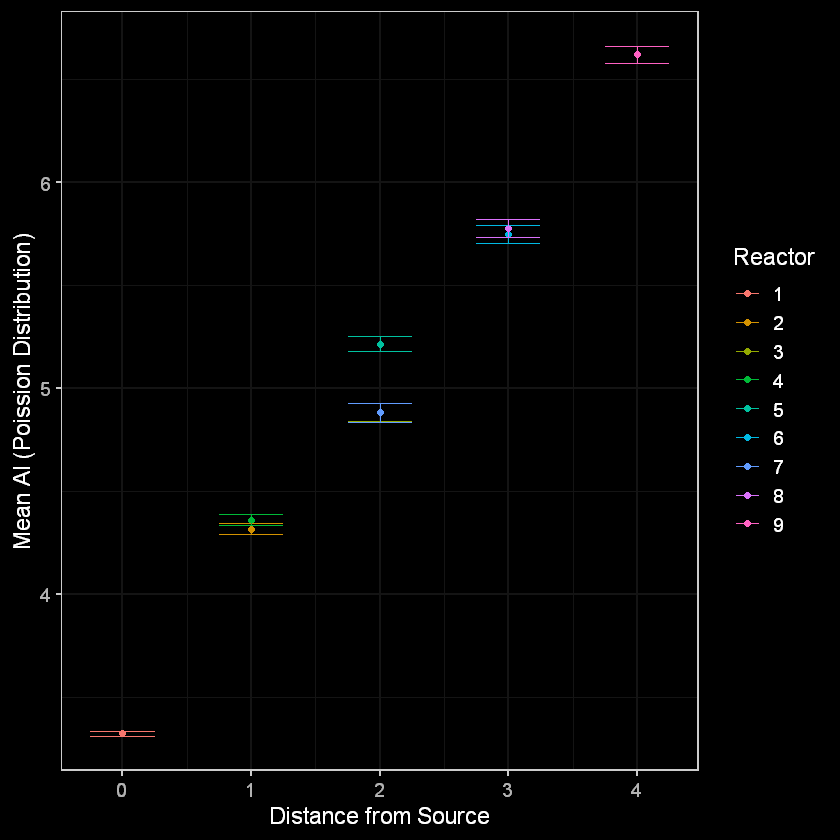

In [142]:
p